In [2]:
#Importando algumas bibliotecas básicas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [5]:
#Importando os dados
df_heart = pd.read_csv('D:/ML/DU/framingham.csv', 
                            sep=',',  encoding='latin-1', low_memory = False)

In [6]:
#Visualizando os primeiros cinco dados
df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
#Renomeando as coluna que identifica sexo masculino ou não
df_heart.rename(columns={'male':'Sex_male'},inplace=True)

In [8]:
df_heart.head()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
#verifica se existem colunas com valores vazios
for col in (df_heart):
    if(df_heart[col].isnull().any()):
        print(col)

education
cigsPerDay
BPMeds
totChol
BMI
heartRate
glucose


In [10]:
#Soma dos valores ausentes
df_heart.isnull().sum()

Sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
#deletando os valores vazios
df_heart.dropna(axis=0,inplace=True)

In [12]:
df_heart.head()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
df_heart.columns

Index(['Sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
df_heart1 = df_heart[['Sex_male', 'age','totChol','TenYearCHD']]

In [15]:
df_heart1.head()

,Sex_male,age,totChol,TenYearCHD
0,1,39,195.0,0
1,0,46,250.0,0
2,1,48,245.0,0
3,0,61,225.0,1
4,0,46,285.0,0


In [19]:
#Grau de correlação
corr = df_heart1.corr()
corr

,Sex_male,age,totChol,TenYearCHD
Sex_male,1.000000,-0.024412,-0.070321,0.091688
age,-0.024412,1.000000,0.268252,0.233983
totChol,-0.070321,0.268252,1.000000,0.091338
TenYearCHD,0.091688,0.233983,0.091338,1.000000


<Figure size 432x288 with 0 Axes>

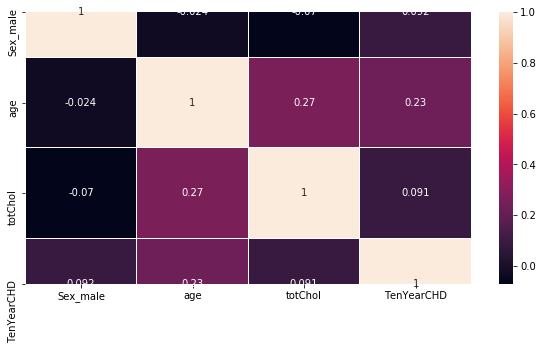

In [29]:
#Correlação de multiplas variáveis
%matplotlib inline
import seaborn as sns
fig = plt.figure()
fig.suptitle('Correlação Doença cardíaca')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, linewidth=0.1)

In [17]:
from statsmodels.tools import add_constant as add_constant
df_heart1_constant = add_constant(df_heart1)
df_heart1_constant.head()

D:\Programas\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Sex_male,age,totChol,TenYearCHD
0,1.0,1,39,195.0,0
1,1.0,0,46,250.0,0
2,1.0,1,48,245.0,0
3,1.0,0,61,225.0,1
4,1.0,0,46,285.0,0


In [18]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_heart1_constant.columns[:-1]
model=sm.Logit(df_heart1.TenYearCHD,df_heart1_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.392805
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3654
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                 0.07927
Time:                        02:40:34   Log-Likelihood:                -1436.9
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.361e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8174      0.398    -17.146      0.000      -7.597      -6.038
Sex_male       0.6274      0.097      6.438      0.000       0.436       0.818
age            0.0765      0.006     13.061      0.000       0.065       0.088
totChol        0.0035      0.001      3.222      0.001       0.001       0.006
==============================================================================
"""

In [30]:
#Saída dos parâmetros da regressão logística
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

          CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const         0.000502       0.002386    0.001095   0.000
Sex_male      1.547107       2.266900    1.872735   0.000
age           1.067146       1.091919    1.079462   0.000
totChol       1.001387       1.005709    1.003546   0.001
